In [1]:
import tensorflow as tf

In [2]:
import keras

Using TensorFlow backend.


In [3]:
import pandas
import sklearn
import matplotlib
import pandas as pd

In [4]:
df = pd.read_csv('dlprj1.csv')

In [5]:
df

,Latitude,Longitude,Slope-gradient,Slope-aspect,PGA-Magnitude,Dist-active-fault,Land-cover,strata-unit,Class
0,140.847700,38.914299,81.32,55.19,7.64,2.692589e+00,1,4,1
1,140.844412,38.912714,81.32,55.19,7.64,2.692589e+00,1,4,1
2,140.851338,38.912466,81.32,55.19,7.64,2.692589e+00,1,4,1
3,140.851296,38.898872,58.88,34.62,7.03,2.692589e+00,1,5,1
4,140.861927,38.906827,73.66,48.76,7.52,2.692589e+00,1,4,1
...,...,...,...,...,...,...,...,...,...
349483,142.050235,39.951233,32.97,31.25,7.16,-3.400000e+38,9,0,0
349484,142.051676,39.960073,32.91,31.19,7.16,-3.400000e+38,9,0,0
349485,142.053117,39.968913,32.83,31.12,7.15,-3.400000e+38,9,0,0
349486,142.053838,39.973332,32.75,31.05,7.15,-3.400000e+38,9,0,0


In [6]:
dataset = df.values

In [7]:
dataset

array([[140.8477003 ,  38.91429939,  81.32      , ...,   1.        ,
          4.        ,   1.        ],
       [140.8444123 ,  38.91271398,  81.32      , ...,   1.        ,
          4.        ,   1.        ],
       [140.8513378 ,  38.91246554,  81.32      , ...,   1.        ,
          4.        ,   1.        ],
       ...,
       [142.0531171 ,  39.96891256,  32.83      , ...,   9.        ,
          0.        ,   0.        ],
       [142.0538381 ,  39.97333239,  32.75      , ...,   9.        ,
          0.        ,   0.        ],
       [142.0545592 ,  39.97775221,  32.75      , ...,   9.        ,
          0.        ,   0.        ]])

In [8]:
X = dataset[:,0:8]

In [9]:
Y = dataset[:,8]

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

In [12]:
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale

array([[0.89186774, 0.83691274, 0.34047099, ..., 1.        , 0.        ,
        0.28571429],
       [0.89157391, 0.83669608, 0.34047099, ..., 1.        , 0.        ,
        0.28571429],
       [0.89219281, 0.83666213, 0.34047099, ..., 1.        , 0.        ,
        0.28571429],
       ...,
       [0.99959065, 0.98103351, 0.12002182, ..., 0.        , 0.72727273,
        0.        ],
       [0.99965508, 0.98163751, 0.11965812, ..., 0.        , 0.72727273,
        0.        ],
       [0.99971953, 0.98224151, 0.11965812, ..., 0.        , 0.72727273,
        0.        ]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(244641, 8) (52423, 8) (52424, 8) (244641,) (52423,) (52424,)


In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras import backend as K

In [20]:
model = Sequential()
#K.set_image_dim_ordering('th')
model.add(Convolution2D(30, 5, 5, border_mode= 'valid' , input_shape=(1, 28, 28),activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(15, 3, 3, activation= 'relu' ))
model.add(MaxPooling2D(pool_size=(2, 2)))


E:\Anaconda3\envs\Intuitive-deep-learning\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  """


In [21]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(8,)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
    ])

In [22]:
model.compile(optimizer='sgd', 
               loss='binary_crossentropy', 
               metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
hist = model.fit(X_train, Y_train,
                 batch_size=100, epochs=5,
                 validation_data=(X_val, Y_val))




Train on 244641 samples, validate on 52423 samples
Epoch 1/5





244641/244641 [==============================] - 5s 22us/step - loss: 0.1626 - acc: 0.9683 - val_loss: 0.1330 - val_acc: 0.9700
Epoch 2/5
244641/244641 [==============================] - 5s 20us/step - loss: 0.1272 - acc: 0.9689 - val_loss: 0.1144 - val_acc: 0.9700
Epoch 3/5
244641/244641 [==============================] - 5s 21us/step - loss: 0.1023 - acc: 0.9687 - val_loss: 0.0864 - val_acc: 0.9690
Epoch 4/5
244641/244641 [==============================] - 5s 19us/step - loss: 0.0833 - acc: 0.9705 - val_loss: 0.0781 - val_acc: 0.9730
Epoch 5/5
244641/244641 [==============================] - 5s 21us/step - loss: 0.0782 - acc: 0.9727 - val_loss: 0.0754 - val_acc: 0.9749


In [24]:
model.evaluate(X_test, Y_test)

52424/52424 [==============================] - 1s 28us/step


[0.07995875412562722, 0.9729322447733862]

In [25]:
model.evaluate(X_test, Y_test)[1]

52424/52424 [==============================] - 1s 21us/step


0.9729322447733862

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 777
Trainable params: 777
Non-trainable params: 0
_________________________________________________________________


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [28]:
# predict probabilities for test set
yhat_probs = model.predict(X_test,verbose=0)

In [29]:
print(yhat_probs)

[[0.07902193]
 [0.00526717]
 [0.0016492 ]
 ...
 [0.00604126]
 [0.6135472 ]
 [0.0077664 ]]


In [30]:
print(yhat_probs)

[[0.07902193]
 [0.00526717]
 [0.0016492 ]
 ...
 [0.00604126]
 [0.6135472 ]
 [0.0077664 ]]


In [31]:
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

In [32]:
import numpy as np
test=np.array([140.84770028312,38.9142993946602,81.32,55.19,7.64,2.6925886,1,4])
test1=np.expand_dims(test,axis=0)
test.shape

(8,)

In [33]:
# predict probabilities for test set
yhat_probs1 = model.predict(test1,verbose=0)
print(yhat_probs1)

[[1.]]


In [34]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [35]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.972932


In [36]:
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)

Precision: 0.602728


In [37]:
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)

Recall: 0.425904
F1 score: 0.499118


In [38]:
#Cohen suggested the Kappa result be interpreted as follows:
#values ≤ 0 as indicating no agreement and 
#0.01–0.20 as none to slight, 0.21–0.40 as fair, 
#0.41– 0.60 as moderate, 0.61–0.80 as substantial, 
#0.81–1.00 as almost perfect agreement

# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)

Cohens kappa: 0.485630
ROC AUC: 0.934259


In [39]:
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

[[50298   466]
 [  953   707]]


In [40]:
import matplotlib.pyplot as plt

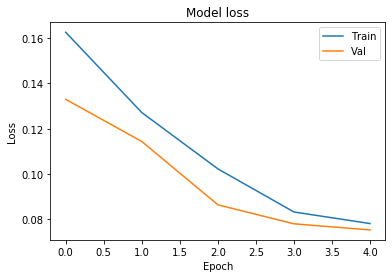

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

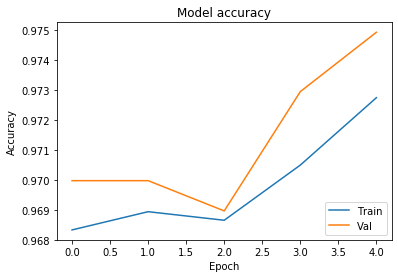

In [42]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [43]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [44]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

In [45]:
# predict probabilities
lr_probs = model.predict_proba(X_test)

In [46]:
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

In [47]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


In [48]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

Text(0, 0.5, 'True Positive Rate')

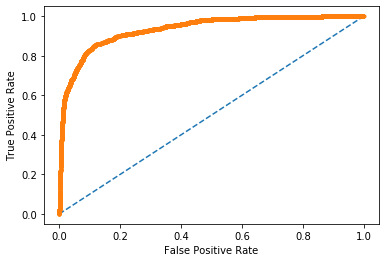

In [49]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')